# Image to Image search Using OpenAI's Open source CLIP Model (Based on Vision Transformer) and ChromaDB

#### This Cookbook demonstrates A reverse image search or image similarity search, using an input image and some provided images which will be indexed or embedded in ChromaDB

##### You can embed text in the same VectorDB space as images, and retreive text and images as well based on input text or image.
##### Following link demonstrates that.
<a> https://python.langchain.com/v0.2/docs/integrations/text_embedding/open_clip/ </a>

## Installs and imports

In [ ]:
!pip install langchain_experimental

In [ ]:
!pip install langchain_chroma

In [2]:
import os

from PIL import Image
from tqdm import tqdm

### Langchain Imports

In [3]:
# Import the Chroma class (any one of following works fine)
from langchain_chroma import Chroma
from langchain_experimental.open_clip import OpenCLIPEmbeddings
# from langchain_community.vectorstores import Chroma

## Provide your paths in a list

#### This Cookbook uses data from this Myntra Kaggle dataset :- <a> https://www.kaggle.com/datasets/hiteshsuthar101/myntra-fashion-product-dataset </a>
#### You can directly download images or read the csv and links from it and then download

In [4]:
all_image_uris = [
    "../../../py_ml_env/images_all/b0eb9426-adf2-4802-a6b3-5dbacbc5f2511643971561167KhushalKWomenBlackEthnicMotifsAngrakhaBeadsandStonesKurtawit7.jpg",
    "../../../py_ml_env/images_all/17ab2ac8-2e60-422d-9d20-2527415932361640754214931-STRAPPY-SET-IN-ORANGE-WITH-ORGANZA-DUPATTA-5961640754214349-2.jpg",
    "../../../py_ml_env/images_all/b8c4f90f-683c-48d2-b8ac-19891a87c0651638428628378KurtaSets1.jpg",
    "../../../py_ml_env/images_all/d2407657-1f04-4d13-9f52-9e134050489b1625905793495-Nayo-Women-Red-Ethnic-Motifs-Printed-Empire-Pure-Cotton-Kurt-1.jpg",
    "../../../py_ml_env/images_all/30b0017d-7e72-4d40-9633-ef78d01719741575541717470-AHIKA-Women-Black--Green-Printed-Straight-Kurta-990157554171-1.jpg",
    "../../../py_ml_env/images_all/507490f7-c8f9-492c-b3f8-c7e977d1af701654922515416SochWomenRedThreadWorkGeorgetteAnarkaliKurta1.jpg",
    "../../../py_ml_env/images_all/5fba9594-3301-4881-ba56-d56a44570e831654747998773LibasWomenNavyBluePureCottonFloralPrintKurtawithPalazzosDupa1.jpg",
    "../../../py_ml_env/images_all/e6b90907-a613-45e1-9b2e-988caaba36581645010770505-Ahalyaa-Women-Beige-Floral-Printed-Regular-Gotta-Patti-Kurta-1.jpg",
    "../../../py_ml_env/images_all/5ea707f4-8491-4d1c-b520-86a1cff4c86e1644841891629-Anouk-Women-Yellow--White-Printed-Kurta-with-Palazzos-706164-1.jpg",
    "../../../py_ml_env/images_all/11b842c5-d9d4-4fee-baa2-0972e3a673641643970773675KhushalKWomenGreenEthnicMotifsPrintedEmpireGottaPattiPureCot7.jpg",
    "../../../py_ml_env/images_all/b783aef9-c902-462e-af73-de159bfd011c1565256752191-Libas-Women-Kurta-Sets-2081565256750830-1.jpg",
    "../../../py_ml_env/images_all/bb925efb-80d9-4cb6-838c-df86f1ba3c3e1637570416652-Varanga-Women-Mustard-Yellow-Floral-Yoke-Embroidered-Straigh-1.jpg",
    "../../../py_ml_env/images_all/7d7656e5-e37d-4f61-9407-98bd341ca8f91640261029836KurtaSets1.jpg",
    "../../../py_ml_env/images_all/43d65352-9853-498e-95a4-be514df0be901559294212152-Vishudh--Straight-Kurta-With-Crop-Palazzo-7041559294209627-1.jpg",
    "../../../py_ml_env/images_all/4a37718e-8942-479c-a7ea-0b074d53ee4b1650456566424AnoukWomenPeach-ColouredYokeDesignMirror-WorkKurtawithTrouse1.jpg",
    "../../../py_ml_env/images_all/5910af54-3435-40d5-95d4-0ac2daf797f51658319613886-SheWill-Women-Maroon-Ethnic-Yoke-Design-Embroided-Kurta-with-1.jpg",
    "../../../py_ml_env/images_all/d57adb8b-e792-477a-8801-6ea570cd88ef1629800170287VarangaWomenYellowFloralPrintedKeyholeNeckThreadWorkKurta1.jpg",
    "../../../py_ml_env/images_all/c35d059d-a357-4863-bcb1-eacd8c988fb01572422803188-AHIKA-Women-Kurtas-8841572422802083-1.jpg",
    "../../../py_ml_env/images_all/3a61f2ab-7905-4efc-84e8-df1f74fa08201623409397327-Anouk-Women-Kurtas-1031623409396642-1.jpg",
    "../../../py_ml_env/images_all/3e9c355b-20e6-42d0-8480-7046979f87711658733247220CharuWomenNavyBlueStripedThreadWorkKurta1.jpg",
    "../../../py_ml_env/images_all/0d391a8b-ea8c-4258-86d5-a99b9f3f34201630040200642-Libas-Women-Kurta-Sets-5941630040199555-1.jpg",
    "../../../py_ml_env/images_all/d6b74d2b-825f-4b34-af01-9d6336045bdb1624612149604-1.jpg",
    "../../../py_ml_env/images_all/07adcdf7-eee1-4077-b55c-f6608caaa6f01647663614971KALINIWomenSeaGreenFloralYokeDesignPleatedPureCottonTopwithS4.jpg",
    "../../../py_ml_env/images_all/6bc412bb-3cc6-4def-8833-f5580b0cc06a1617706648250-Indo-Era-Green-Printed-Straight-Kurta-Palazzo-With-Dupatta-S-1.jpg",
    "../../../py_ml_env/images_all/b1bd0687-7533-428d-8258-d29c793fc4541631092430795-Anouk-Women-Kurta-Sets-941631092429795-1.jpg",
    "../../../py_ml_env/images_all/64e975d5-dbda-4c09-87c0-c5152f9e82c71658736715566TOULINWomenTealFloralAngrakhaKurtiwithPalazzosWithDupatta1.jpg",
    "../../../py_ml_env/images_all/d1a4cc48-ff90-47ab-ad36-800743e83d641605767381033-Ishin-Womens-Rayon-Red-Bandhani-Print-Embellished-Anarkali-K-1.jpg",
]

## (Optional) Prepare Metadata to index alongside the image

In [5]:
metadatas = []
for idx, img in enumerate(all_image_uris):
    meta_dict = {}
    meta_dict["path"] = img
    meta_dict["id"] = idx
    metadatas.append(meta_dict)
print(metadatas[:5])

[{'path': '../../../py_ml_env/images_all/b0eb9426-adf2-4802-a6b3-5dbacbc5f2511643971561167KhushalKWomenBlackEthnicMotifsAngrakhaBeadsandStonesKurtawit7.jpg', 'id': 0}, {'path': '../../../py_ml_env/images_all/17ab2ac8-2e60-422d-9d20-2527415932361640754214931-STRAPPY-SET-IN-ORANGE-WITH-ORGANZA-DUPATTA-5961640754214349-2.jpg', 'id': 1}, {'path': '../../../py_ml_env/images_all/b8c4f90f-683c-48d2-b8ac-19891a87c0651638428628378KurtaSets1.jpg', 'id': 2}, {'path': '../../../py_ml_env/images_all/d2407657-1f04-4d13-9f52-9e134050489b1625905793495-Nayo-Women-Red-Ethnic-Motifs-Printed-Empire-Pure-Cotton-Kurt-1.jpg', 'id': 3}, {'path': '../../../py_ml_env/images_all/30b0017d-7e72-4d40-9633-ef78d01719741575541717470-AHIKA-Women-Black--Green-Printed-Straight-Kurta-990157554171-1.jpg', 'id': 4}]


## Initialize the OpenAI CLIP Model

In [6]:
# You can use other models like Vit G 14, Vit H 14, Vit B32 etc.
# Vit-L-14 - Larger , but more performant
# ViT-B-32 - Smaller, less performant model

# model_name = "ViT-L-14"
# checkpoint = "laion2b_s32b_b82k"

# Uncomment following to use that model
model_name = "ViT-B-32"
checkpoint = "laion2b_s34b_b79k"

clip_embd = OpenCLIPEmbeddings(model_name=model_name, checkpoint=checkpoint)

### Sample test of images

In [7]:
# Embed images

img_feat_1 = clip_embd.embed_image([all_image_uris[0]])

### Dimentions of embeddings

In [8]:
len(img_feat_1[0])

512

### Initialize the Chroma Client, persist_directory is optinal if you want to save the VectorDB to disk and reload it using same code and path

In [9]:
collection_name = "chroma_img_collection_1"
chroma_client = Chroma(
    collection_name=collection_name,
    embedding_function=clip_embd,
    persist_directory="./indexed_db",
)

In [10]:
def embed_images(chroma_client, uris, metadatas=[]):
    """
    Function to add images to Chroma client with progress bar.

    Args:
        chroma_client: The Chroma client object.
        uris (List[str]): List of image file paths.
        metadatas (List[dict]): List of metadata dictionaries.
    """
    # Iterate through the uris with a progress bar
    success_count = 0
    for i in tqdm(range(len(uris)), desc="Adding images"):
        uri = uris[i]
        metadata = metadatas[i]

        try:
            chroma_client.add_images(uris=[uri], metadatas=[metadata])
        except Exception as e:
            print(f"Failed to add image {uri} with metadata {metadata}. Error: {e}")
        else:
            success_count += 1
            # print(f"Successfully added image {uri} with metadata {metadata}")

    return success_count

### Specify your image paths list in this embed_images function call

In [11]:
success_count = embed_images(chroma_client, uris=all_image_uris, metadatas=metadatas)
if success_count:
    print(f"{success_count} Images Embedded Successfully")
else:
    print("No images Embedded")

Adding images: 100%|████████████████████████████████████████████████████████████████████| 27/27 [00:03<00:00,  7.43it/s]

27 Images Embedded Successfully


## Helper function to plot retrieved similar images

In [12]:
import math

import matplotlib.pyplot as plt


def plot_images_by_side(image_data):
    num_images = len(image_data)
    n_col = 2  # Fixed number of columns
    n_row = math.ceil(num_images / n_col)  # Calculate the number of rows

    # Reduce the size of each figure
    fig, axs = plt.subplots(n_row, n_col, figsize=(10, 5 * n_row))
    axs = axs.flatten()

    for idx, data in enumerate(image_data):
        img_path = data["path"]
        score = round(data.get("score", 0), 2)
        img = Image.open(img_path)
        ax = axs[idx]
        ax.imshow(img)
        # Assuming similarity is not available in the new data, removed sim_score
        ax.title.set_text(f"\nProduct ID: {data["id"]}\n Score: {score}")
        ax.axis("off")  # Turn off axis

    # Hide any remaining empty subplots
    for i in range(num_images, n_row * n_col):
        axs[i].axis("off")

    plt.tight_layout()
    plt.show()

## Take in input image path, resize that image and display it

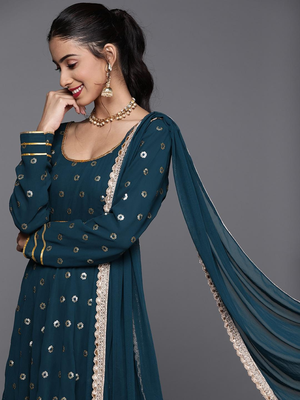

In [13]:
search_img_path = "../../../py_ml_env/images_all/0d391a8b-ea8c-4258-86d5-a99b9f3f34201630040200642-Libas-Women-Kurta-Sets-5941630040199555-1.jpg"

my_image = Image.open(search_img_path).convert("RGB")
# Resize the image while maintaining the aspect ratio
max_width = 400
max_height = 400

width, height = my_image.size
aspect_ratio = width / height

if width > height:
    new_width = min(width, max_width)
    new_height = int(new_width / aspect_ratio)
else:
    new_height = min(height, max_height)
    new_width = int(new_height * aspect_ratio)

my_image_resized = my_image.resize((new_width, new_height), Image.LANCZOS)

# Display the resized image
my_image_resized

## Perform Image similarity search, get the metadata of K retrieved images and then display similar images

### We have embeded limited data, we can embed a large number which will have similar images, to get better results

In [14]:
k = 10

## This returns a list of Langchain document object, with page_content as the base64 encoded image, this approach uses path from metadata to display images
## We can use that b64 encoded images as well after decoding it

similar_images = chroma_client.similarity_search_by_image(uri=search_img_path, k=k)

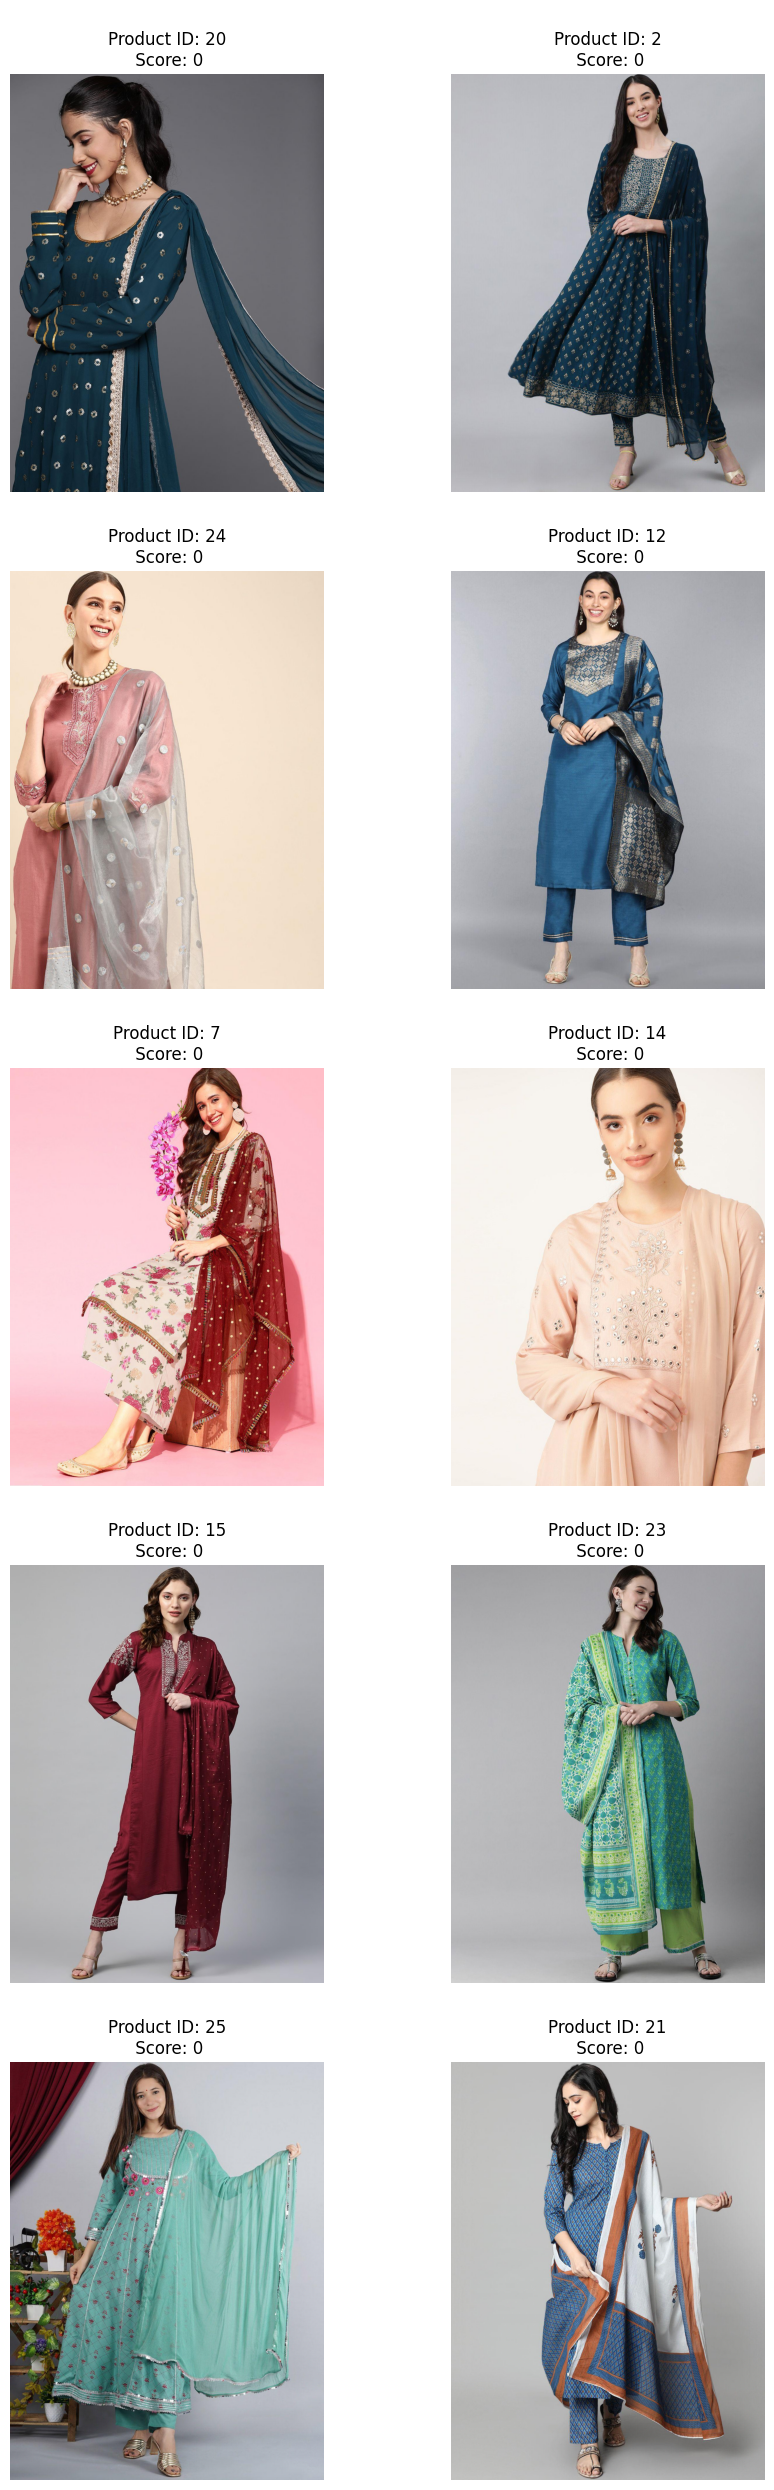

In [15]:
similar_image_data_1 = []
for img in similar_images:
    # Get metadata from Doc object
    similar_image_data_1.append(img.metadata)
plot_images_by_side(similar_image_data_1)

## Perform similarity search with image with relevance scores:
 We get a list of K tuples like following:
 [
    (Langchain_Document,score),
   (Langchain_Document,score),
   Langchain_Document,score)
   ]

In [16]:
similar_images = chroma_client.similarity_search_by_image_with_relevance_score(
    uri=search_img_path, k=k
)

In [20]:
similar_image_data_2 = []
for img in similar_images:
    # Get metadata from Doc object
    meta_dict = img[0].metadata
    # Add score to it
    meta_dict["score"] = img[1]
    similar_image_data_2.append(meta_dict)

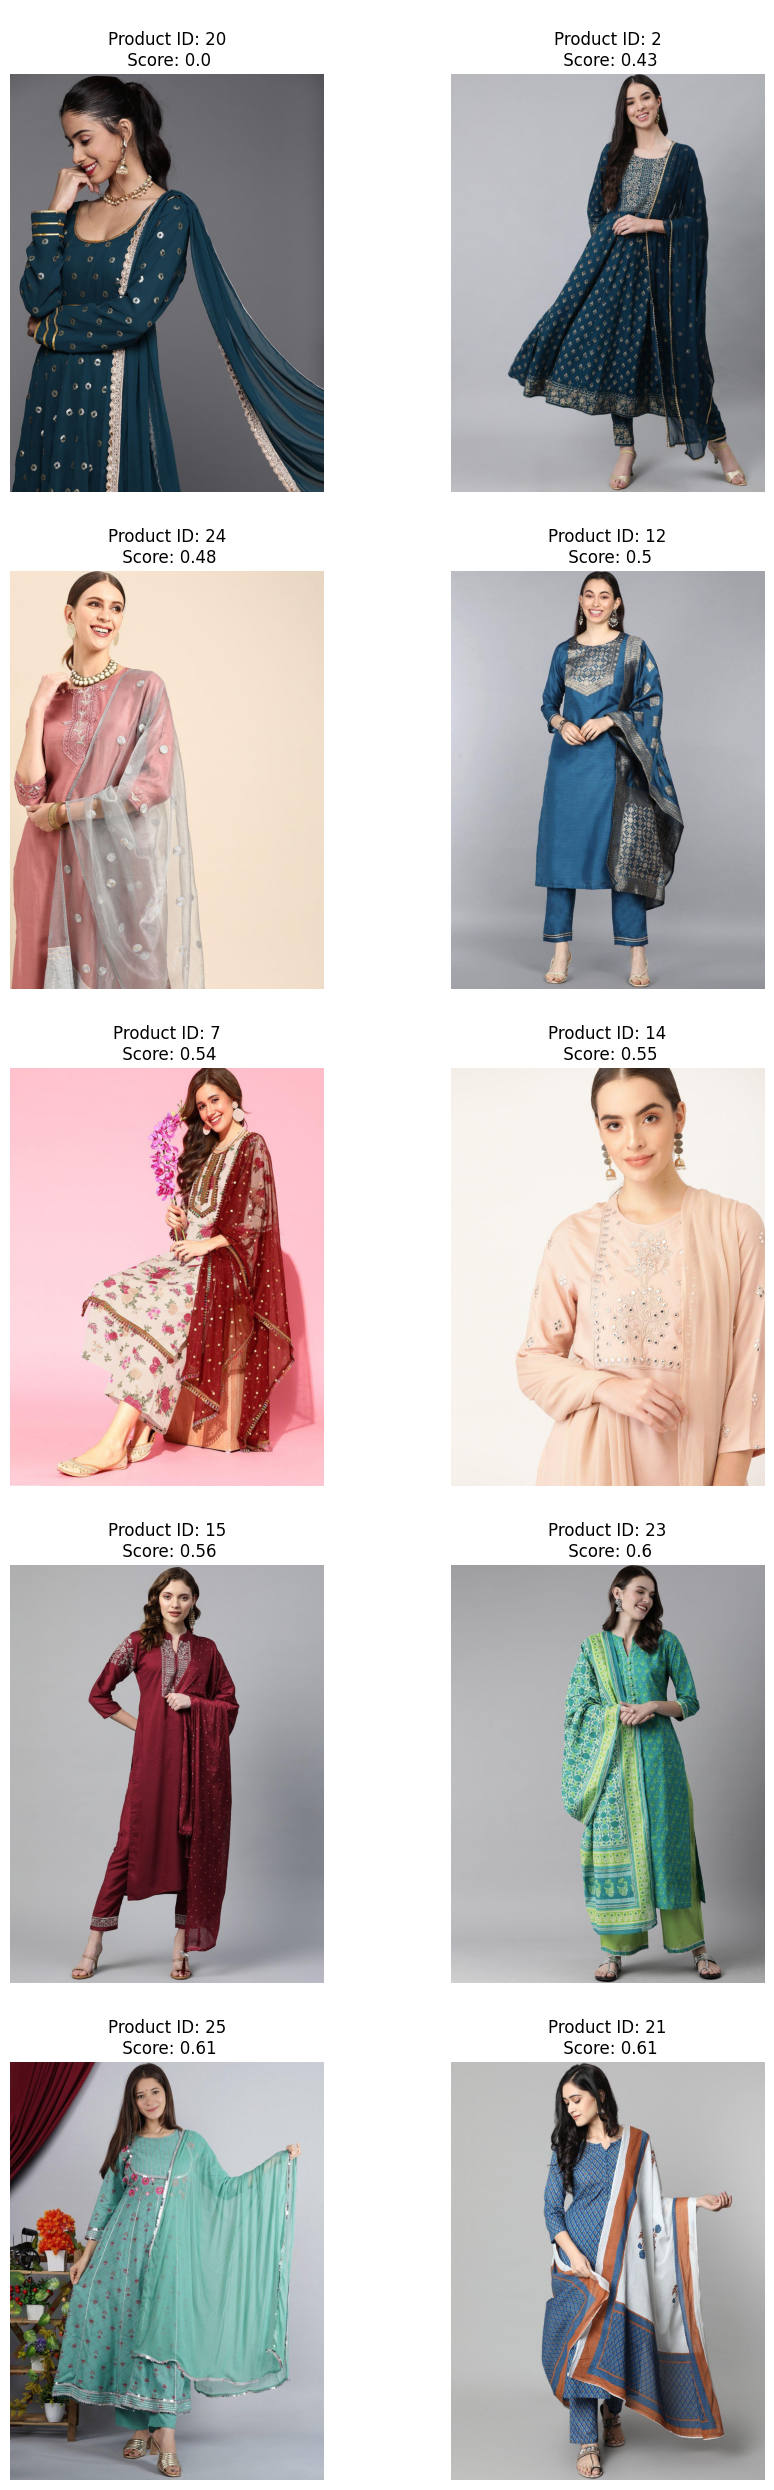

In [21]:
plot_images_by_side(similar_image_data_2)

## We have successfully implemented an image-to-image search using CLIP and ChromaDB !